# General Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read File

In [ ]:
df = pd.read_csv('train.csv')

# Simple Profiling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Profiling and data visualization

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df)
profile.to_file('PreProfiling.html')

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


# Missing values and handle categorical

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df['Age'].fillna((df['Age'].median()), inplace = True)
df['Embarked'].fillna('S', inplace = True)

### Handle Categorical

##### One-Hot

In [ ]:
categorical_cols = ['Pclass', 'Embarked']
df = pd.get_dummies(df, columns = categorical_cols, drop_first = True)

In [ ]:
df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,1,0,1


##### OR using LabelEncoder
###### Encode target labels with value between 0 and n_classes-1

In [ ]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [ ]:
df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,1,0,1


# drop useless coloumns

In [ ]:
drop_cols=['Name', 'Ticket', 'Cabin']
df.drop( labels=drop_cols ,axis=1 , inplace = True)

# profiling after preprocess and drop coloumns

In [ ]:
profile = ProfileReport(df)
profile.to_file('cleanDataProfiling.html')
df.head()

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,0,1,22.0,1,0,7.2500,0,1,0,1
1,2,1,0,38.0,1,0,71.2833,0,0,0,0
2,3,1,0,26.0,0,0,7.9250,0,1,0,1
3,4,1,0,35.0,1,0,53.1000,0,0,0,1
4,5,0,1,35.0,0,0,8.0500,0,1,0,1


# cols for train and target

In [ ]:
train_cols = ['Age','SibSp','Parch','Fare','Pclass_2', 'Pclass_3', 'Embarked_Q', 'Embarked_S',
       'Sex']
target_col = 'Survived'

# train-test split

##### sample method frac = 1 then sampling all of the data frame by random

In [ ]:
from sklearn.model_selection import train_test_split
# train,test = train_test_split(df.sample(frac=1))
train,test = train_test_split(df)
xtrain = train[train_cols]
ytrain = train[target_col]
xdev = test[train_cols]
ydev = test[target_col]

# Normilize numeric features

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(xtrain)
x_train

array([[-0.91110052, -0.46607527, -0.48132965, ..., -0.28444006,
        -1.66553634, -1.36187402],
       [-0.07692302, -0.46607527, -0.48132965, ...,  3.51567917,
        -1.66553634,  0.73428231],
       [ 2.72894677, -0.46607527, -0.48132965, ...,  3.51567917,
        -1.66553634,  0.73428231],
       ...,
       [-0.03900586, -0.46607527, -0.48132965, ..., -0.28444006,
        -1.66553634,  0.73428231],
       [-0.60776325, -0.46607527, -0.48132965, ..., -0.28444006,
         0.60040719,  0.73428231],
       [-0.60776325,  0.37995267, -0.48132965, ..., -0.28444006,
         0.60040719, -1.36187402]])

In [ ]:
x_dev = scaler.transform(xdev)

In [ ]:
y_train = ytrain

In [ ]:
y_dev = ydev

# model tunning (updating...)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# select hyper parameters of an model

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline

## pipeline

In [ ]:
class GridSearch(object):
    
    def __init__(self,X_train,y_train,pipeline,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.pipeline = pipeline
        self.hyperparameters = hyperparameters
        
    def GridSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = GridSearchCV(  self.pipeline,
                             self.hyperparameters,
                             cv=cv,
                             verbose=0,
                             n_jobs=-1,
                             )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.GridSearch()
        pred = best_model.predict(X_test)
        return pred

## random search

In [ ]:
class RandomSearch(object):
    def __init__(self,X_train,y_train,pipeline,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.pipeline = pipeline
        self.hyperparameters = hyperparameters
        
    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = RandomizedSearchCV(self.pipeline,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=100,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred

# scoring

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score,accuracy_score

In [ ]:
# one way to feature extraction is after fiting models like decision tree or random forest
# use feature importance to select the best features

# select k best for feature engineering

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
skb = SelectKBest(mutual_info_classif, k=3)
skb.fit(x_train, y_train)
skb.get_support()

array([ True, False, False,  True, False, False, False, False,  True])

In [ ]:
df[train_cols].columns[skb.get_support()]

Index(['Age', 'Fare', 'Sex'], dtype='object')

In [ ]:
scores = {}
for i in range(len(train_cols)):
    scores[train_cols[i]] = skb.scores_[i]
skb.scores_
scores

{'Age': 0.04596333621220894,
 'Embarked_Q': 0.0017655502219435792,
 'Embarked_S': 0.02573791035163331,
 'Fare': 0.11285863558996123,
 'Parch': 0.026050967162245753,
 'Pclass_2': 0.0,
 'Pclass_3': 0.03191611775923309,
 'Sex': 0.14967785113633414,
 'SibSp': 0.029465384738845524}

In [ ]:
import seaborn as sns
sns.set()
color = sns.color_palette()

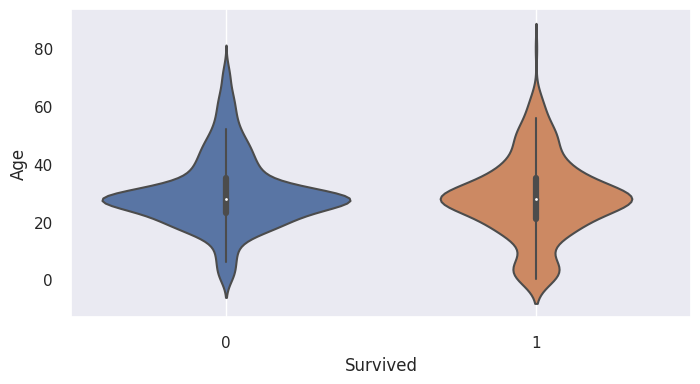

In [ ]:
plt.figure(figsize=(8,4))
sns.violinplot(x='Survived', y='Age', data=df)
plt.xlabel('Survived', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.grid()
plt.show()

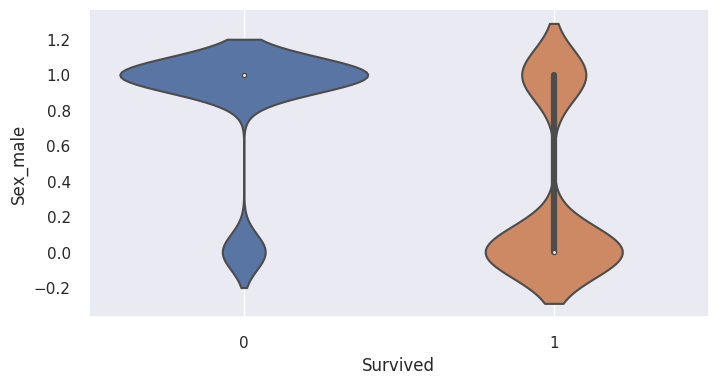

In [ ]:
plt.figure(figsize=(8,4))
sns.violinplot(x='Survived', y='Sex', data=df)
plt.xlabel('Survived', fontsize=12)
plt.ylabel('Sex_male', fontsize=12)
plt.grid()
plt.show()

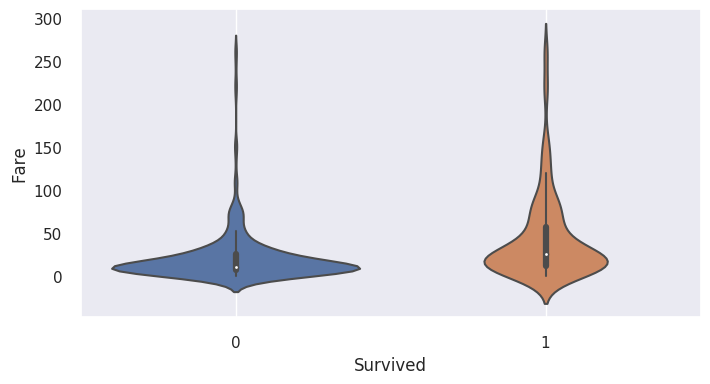

In [ ]:
analyse_df = df[df['Fare'] < 300]

plt.figure(figsize=(8,4))
sns.violinplot(x='Survived', y='Fare', data=analyse_df)
plt.xlabel('Survived', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.grid()
plt.show()

# Main procedure

In [ ]:
accuracies = []
models = []

### Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
yhat = gnb.predict(x_dev)

accuracies.append(accuracy_score(y_dev, yhat))
models.append('Naive Bayes')
accuracies[-1]

0.7937219730941704

### Decision Treee

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
yhat = clf.predict(x_dev)

accuracies.append(accuracy_score(y_dev, yhat))
models.append('Decision Tree')
accuracies[-1]

0.7757847533632287

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


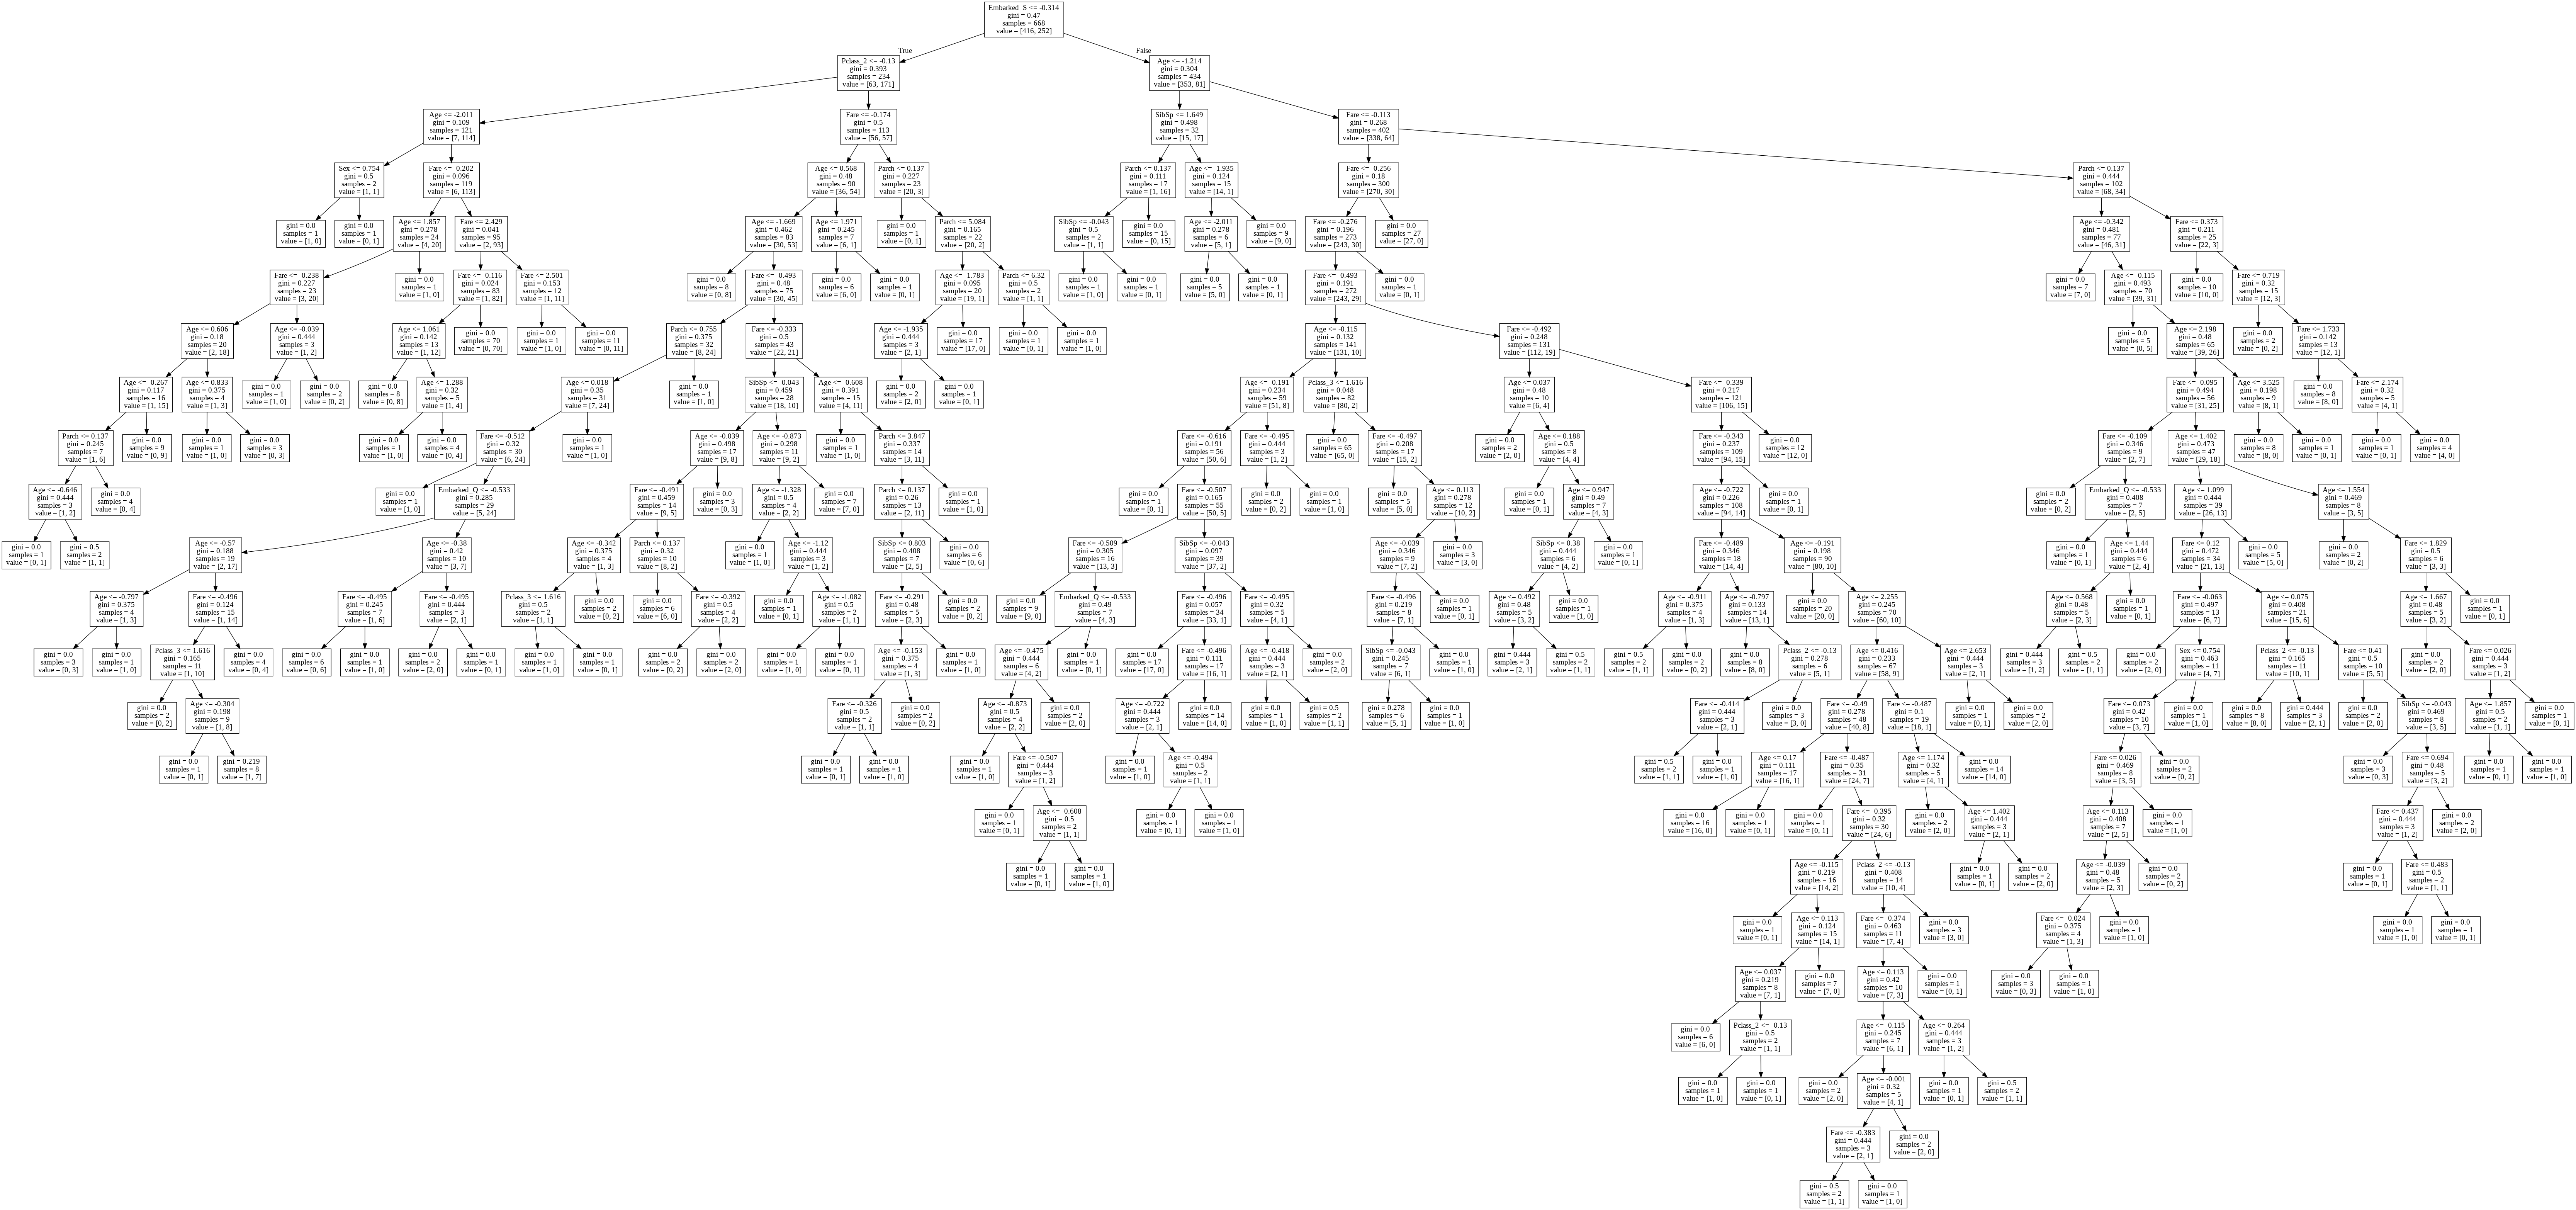

In [ ]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

features = ['Age','SibSp','Parch','Fare', 'Sex', 'Pclass_2', 'Pclass_3', 'Embarked_Q','Embarked_S']

dot_data = StringIO()  
export_graphviz(clf, out_file=dot_data, feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### SVM

In [ ]:
from sklearn.decomposition import PCA

pca4 = PCA()
svm4 = SVC(gamma='auto')
pipe4 = Pipeline(steps=[('pca4', pca4), ('svm', svm4)])

param_grid4 = {
    'pca4__n_components': [1,2,3,4,5,6,7,8,9],
    'svm__kernel':['rbf', 'linear'],
}
search4 = GridSearchCV(pipe4, param_grid4, n_jobs=-1)
search4.fit(x_train, y_train)
print("Best parameter (CV score=%0.3f):" % search4.best_score_)
print(search4.best_params_)

Best parameter (CV score=0.819):
{'pca4__n_components': 7, 'svm__kernel': 'rbf'}


In [ ]:
y_pred4 = search4.predict(x_dev)

accuracies.append(accuracy_score(y_dev, y_pred4))
models.append('SVM')
accuracies[-1]

0.852017937219731

### Random Forest


In [ ]:
random_forest= RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_dev)

accuracies.append(accuracy_score(y_dev, y_pred))
models.append('Random Forest')
accuracies[-1]

0.8340807174887892

## Comparing Result

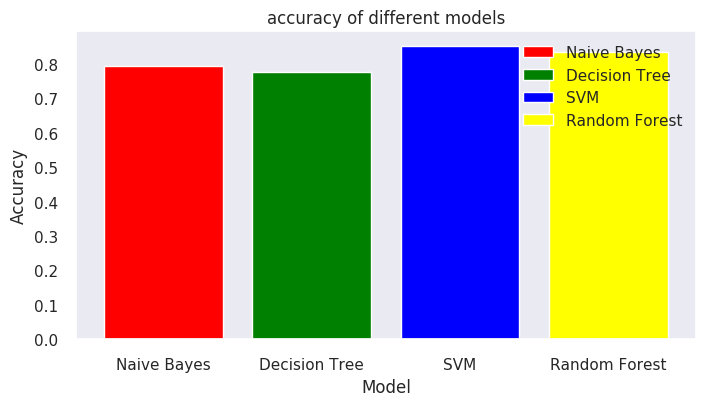

In [ ]:
plt.figure(figsize=(8,4))
plt.title('Artists with Most Likes')
classes = ('Naive Bayes','Decision Tree','SVM','Random Forest')
colors_dict = dict(zip(
    classes, [ 'red', 'green', 'blue' ,'yellow']
))
# for i, _class in enumerate(classes): 
#     plt.bar(models[i],accuracies[i],color = colors_dict[_class],
#         label = _class)
plt.legend()
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid()
plt.show()

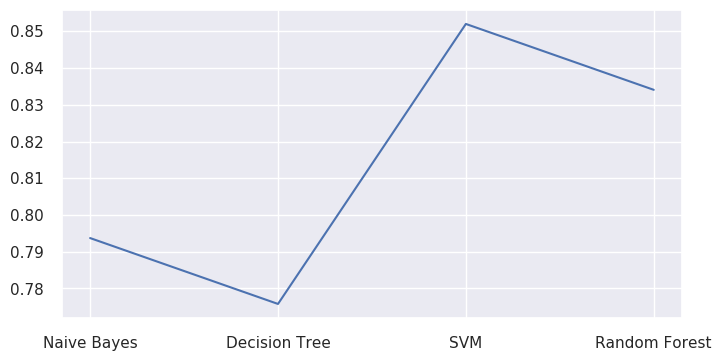

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(models,accuracies)